# Comunicação entre plantas (Sim, você leu certo)

O dataset escolhido para este trabalho contém informações de sinais biológicos emitidos por plantas, juntamente com fatores ambientais, como umidade do solo e luz solar.

Disponível em: https://www.kaggle.com/datasets/efeyldz/plant-communication-dataset-classification/data

O objetivo é classificar o tipo de mensagem que a planta está (provavelmente) tentando transmitir com os respectivos sinais emitidos, sendo "Warning", "Contentment", "Distress" e "Invitation". 

## 📋 Características do Dataset

- **Plant_ID**: Identificador único da planta (usado para rastreamento, não para modelagem).  

- **Leaf_Vibration_Hz**: Frequência das vibrações sutis das folhas (medida em Hertz).  

- **Pollen_Scent_Complexity**: Pontuação (1–10) que avalia a complexidade do cheiro do pólen da 
planta.  
- **Bioluminescence_Intensity_Lux**: Intensidade da luz emitida pela planta (em Lux).  

- **Root_Signal_Strength_mV**: Intensidade do sinal elétrico medido nas raízes da planta (em 
milivolts).  
- **Growth_Rate_mm_day**: Velocidade de crescimento da planta (em milímetros por dia).  

- **Ambient_Temperature_C**: Temperatura ambiente ao redor da planta (em °C).  

- **Soil_Moisture_Level**: Nível de umidade do solo, variando de 0 (seco) a 1 (totalmente saturado).  

- **Sunlight_Exposure_Hours**: Número de horas de exposição ao sol recebidas no último dia.  

- **Symbiotic_Fungus_Present**: Indica se há presença de fungo simbiótico nas raízes (0 = Não, 1 = 
Sim).  
- **Plant_Message_Type**: Variável alvo — tipo de mensagem emitida pela planta (Categorias: Warning: *Alerta*, Contentment: *Contentamento*, Distress: *Sofrimento*, Invitation: *Convite*).


## Interpretando o dataset

In [107]:
import pandas as pd
dataframe = pd.read_csv("plant_communication_dataset.csv")

In [108]:
dataframe.head()

,Plant_ID,Leaf_Vibration_Hz,Pollen_Scent_Complexity,Bioluminescence_Intensity_Lux,Root_Signal_Strength_mV,Growth_Rate_mm_day,Ambient_Temperature_C,Soil_Moisture_Level,Sunlight_Exposure_Hours,Symbiotic_Fungus_Present,Plant_Message_Type
0,PLANT_0001,57.45,7,2.70,117.61,2.25,25.6,0.27,9.5,0,Distress
1,PLANT_0002,47.93,1,21.55,208.47,4.46,15.3,0.28,9.9,0,Warning
2,PLANT_0003,59.72,8,3.53,193.31,5.05,34.3,0.41,8.9,0,Invitation
3,PLANT_0004,72.85,3,5.90,149.65,1.53,23.6,0.36,5.8,1,Distress
4,PLANT_0005,46.49,6,58.61,135.20,4.89,24.3,0.82,5.2,1,Contentment


In [109]:
print(dataframe.shape)

(1000, 11)


## Tamanho do dataset
1000 registros e 10 colunas

## Vamos ver agora a proporção de cada classe

In [110]:
columns = dataframe.columns.to_list()
for col in columns:
    print(dataframe[col].value_counts(normalize=True) * 100)
    print("-----------")

Plant_ID
PLANT_1000    0.1
PLANT_0001    0.1
PLANT_0002    0.1
PLANT_0003    0.1
PLANT_0004    0.1
             ... 
PLANT_0012    0.1
PLANT_0013    0.1
PLANT_0014    0.1
PLANT_0015    0.1
PLANT_0016    0.1
Name: proportion, Length: 1000, dtype: float64
-----------
Leaf_Vibration_Hz
41.35    0.3
33.78    0.3
53.36    0.3
59.49    0.3
52.95    0.3
        ... 
47.60    0.1
49.71    0.1
34.96    0.1
49.72    0.1
45.18    0.1
Name: proportion, Length: 910, dtype: float64
-----------
Pollen_Scent_Complexity
5     11.1
4     10.9
2     10.5
6     10.2
10    10.1
7      9.9
9      9.6
8      9.4
3      9.3
1      9.0
Name: proportion, dtype: float64
-----------
Bioluminescence_Intensity_Lux
0.63     0.4
2.78     0.4
6.27     0.3
0.06     0.3
1.42     0.3
        ... 
3.18     0.1
13.38    0.1
2.79     0.1
9.25     0.1
2.22     0.1
Name: proportion, Length: 898, dtype: float64
-----------
Root_Signal_Strength_mV
208.05    0.3
145.40    0.2
211.33    0.2
182.10    0.2
151.34    0.2
         ..

A nossa variável alvo é a *Plant_Message_Type*, cujo a proporção é:

Contentment: 40.8

Warning: 21.2

Distress: 19.3

Invitation: 18.7

## Onde há valores nulos?

In [111]:
print(dataframe.isnull().sum())

Plant_ID                         0
Leaf_Vibration_Hz                0
Pollen_Scent_Complexity          0
Bioluminescence_Intensity_Lux    0
Root_Signal_Strength_mV          0
Growth_Rate_mm_day               0
Ambient_Temperature_C            0
Soil_Moisture_Level              0
Sunlight_Exposure_Hours          0
Symbiotic_Fungus_Present         0
Plant_Message_Type               0
dtype: int64


## Transformação, tratamento e limpeza dos dados

In [112]:
# O identificador da planta não impacta em nada
dataframe.drop(columns=["Plant_ID"], inplace=True)

# Tratando as variáveis categoricas
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
dataframe["Plant_Message_Type"] = encoder.fit_transform(dataframe[["Plant_Message_Type"]])

dataframe.head()




,Leaf_Vibration_Hz,Pollen_Scent_Complexity,Bioluminescence_Intensity_Lux,Root_Signal_Strength_mV,Growth_Rate_mm_day,Ambient_Temperature_C,Soil_Moisture_Level,Sunlight_Exposure_Hours,Symbiotic_Fungus_Present,Plant_Message_Type
0,57.45,7,2.70,117.61,2.25,25.6,0.27,9.5,0,1.0
1,47.93,1,21.55,208.47,4.46,15.3,0.28,9.9,0,3.0
2,59.72,8,3.53,193.31,5.05,34.3,0.41,8.9,0,2.0
3,72.85,3,5.90,149.65,1.53,23.6,0.36,5.8,1,1.0
4,46.49,6,58.61,135.20,4.89,24.3,0.82,5.2,1,0.0


## Divisão do conjunto de treinamento e teste

In [113]:
# Coluna alvo, ou seja, o que quero identificar
y = dataframe["Plant_Message_Type"]

# Dropando a coluna alvo
dataframe.drop(columns=["Plant_Message_Type"], inplace=True)

X = dataframe.values

# Sem a coluna ID e Plant_Message_Type
print(dataframe.shape)

(1000, 9)


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

## Criação do modelo MLPClassifier

Como o problema é tentar identificar o tipo de mensagem que a planta está tentando passar, vamos usar um classificador.

In [115]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(random_state=42, max_iter=500).fit(X_train, y_train)

y_pred = mlpc.predict(X_test)
y_pred.size

/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


250

## Avaliação do modelo

In [116]:
# Capturando as labels originais
labels = encoder.categories_[0]

In [117]:
import numpy as np
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

              precision    recall  f1-score   support

 Contentment       0.39      0.58      0.47       103
    Distress       0.19      0.14      0.16        42
  Invitation       0.12      0.06      0.08        54
     Warning       0.17      0.14      0.15        51

    accuracy                           0.30       250
   macro avg       0.22      0.23      0.22       250
weighted avg       0.25      0.30      0.27       250



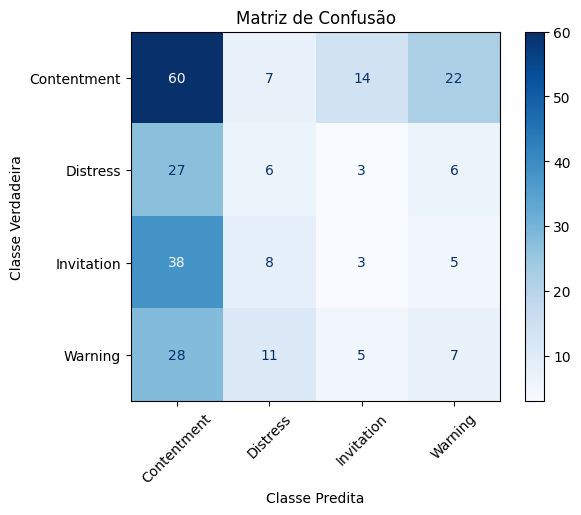

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.xticks(rotation=45)
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.show()

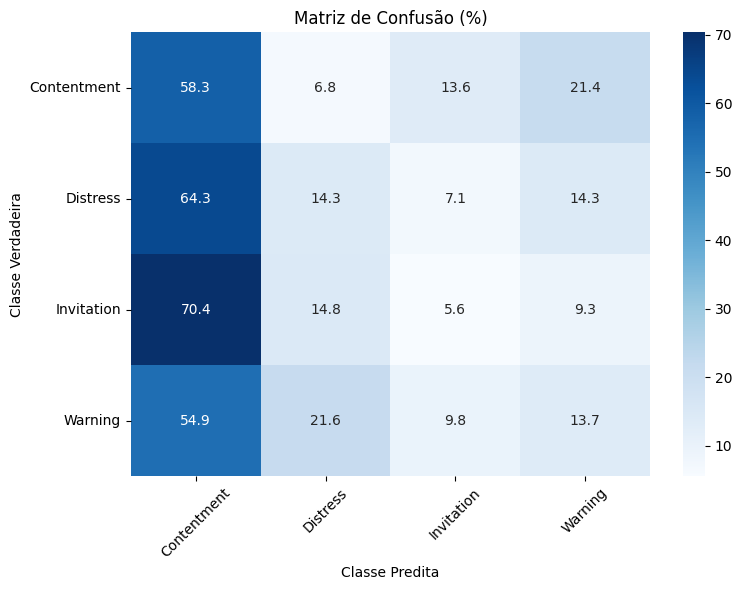

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Converter para porcentagens
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("Matriz de Confusão (%)")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Resultado da parte 1: Horrível

O dataset está um pouco desbalanceado, o modelo prevê muito a mensagem de "Contentment", porém, como podemos observar, a precisão para as classes está extremamente baixo, quase se assimilando como um chute aleatório.

Confesso que gostei do tema, e vou tentar arrumar na parte 2 alguma forma de contornar esse problema de desbalanceamento. Pesquisando eu vi sobre a função SMOTE, que é justamente para lidar com problemas de desbalanceamento em modelos de classificação.

Na parte 2 irei testar outros tipos de modelos, além do MLPClassifier.

Vamos ver se na parte 2, com a definição dos hiperparâmetros, isso é resolvido no modelo atual.

# Parte 2

Vamos utilizar o Keras, em primeiro lugar, sem a utilização de heurísticas (Early Stopping e Drouput).

### Separação do conjunto de treinamento e validação (70% e 30%)

In [120]:
from tensorflow import keras
X_train_val, X_validation, y_train_val, y_validation = train_test_split(X_train, y_train, test_size = 0.30,
                                                    random_state = 7)

### Codificando os rótulos

In [121]:
encoder = keras.layers.CategoryEncoding(
  # Quantidade de classes unicas
  num_tokens=len(np.unique(y_train_val)),
  output_mode="one_hot"
)

y_train_encoded = encoder(y_train_val)


encoder = keras.layers.CategoryEncoding(
  # Quantidade de classes unicas
  num_tokens=len(np.unique(y_validation)),
  output_mode="one_hot"
)

y_validation_encoded = encoder(y_validation)

### Modelo Base

In [122]:
model = keras.Sequential([
    keras.layers.Input((9,)), # 9 variaveis
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(units=4, activation="softmax") # 4 tipos de mensagens da planta
])

### Preparação do modelo

In [123]:
model.compile(
    loss = "categorical_crossentropy",
    metrics=[
        keras.metrics.F1Score(average = 'weighted'),
    ]
)

### Treinamento do modelo

In [124]:
history = model.fit(X_train_val, y_train_encoded, validation_data = (X_validation, y_validation_encoded),  epochs = 500, verbose = 2, batch_size=128)

Epoch 1/500
5/5 - 1s - 122ms/step - f1_score: 0.2880 - loss: 1.3802 - val_f1_score: 0.2867 - val_loss: 1.3347
Epoch 2/500
5/5 - 0s - 16ms/step - f1_score: 0.2607 - loss: 1.3321 - val_f1_score: 0.2802 - val_loss: 1.3287
Epoch 3/500
5/5 - 0s - 17ms/step - f1_score: 0.2463 - loss: 1.3152 - val_f1_score: 0.2789 - val_loss: 1.3271
Epoch 4/500
5/5 - 0s - 15ms/step - f1_score: 0.2646 - loss: 1.3042 - val_f1_score: 0.2693 - val_loss: 1.3226
Epoch 5/500
5/5 - 0s - 15ms/step - f1_score: 0.2397 - loss: 1.2947 - val_f1_score: 0.2650 - val_loss: 1.3234
Epoch 6/500
5/5 - 0s - 16ms/step - f1_score: 0.2613 - loss: 1.2871 - val_f1_score: 0.2610 - val_loss: 1.3241
Epoch 7/500
5/5 - 0s - 16ms/step - f1_score: 0.2625 - loss: 1.2784 - val_f1_score: 0.2614 - val_loss: 1.3266
Epoch 8/500
5/5 - 0s - 16ms/step - f1_score: 0.2691 - loss: 1.2726 - val_f1_score: 0.2595 - val_loss: 1.3262
Epoch 9/500
5/5 - 0s - 16ms/step - f1_score: 0.2815 - loss: 1.2668 - val_f1_score: 0.2595 - val_loss: 1.3251
Epoch 10/500
5/5 -

### Avaliação do modelo base

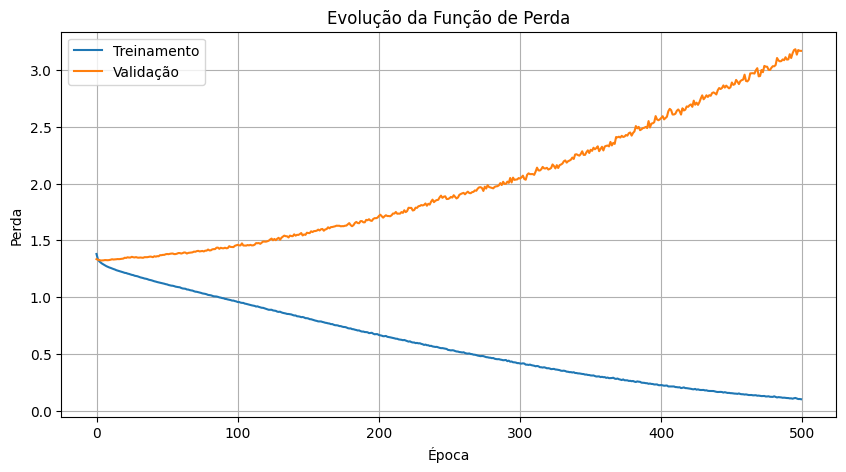

In [125]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Função de Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

Como podemos ver no gráfico da função perda, o modelo está aprendendo cada vez melhor a memorizar os dados de treinamento, porém, a linha laranja indica uma subida abrupta, ou seja, o mesmo está falhando quando se depara com novos dados.

O que significa... OVERFITTING!

Lembrando que, quanto menor a perda, melhor o modelo está aprendendo.

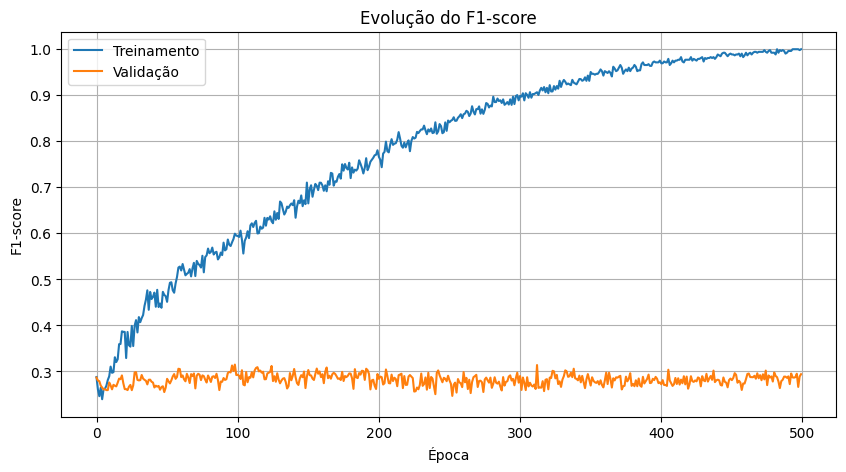

In [126]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['f1_score'], label='Treinamento')
plt.plot(history.history['val_f1_score'], label='Validação')
plt.title('Evolução do F1-score')
plt.xlabel('Época')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()

Olhando o gráfico da F1-Score, temos que o modelo acerta muito bem os dados de treinamento, porém, para novos dados não há nenhum ganho.

In [127]:
from sklearn.metrics import classification_report

phi = model.predict(X_test, verbose = 0)
y_pred = np.argmax(phi, axis = 1)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.32      0.38      0.35       103
         1.0       0.08      0.10      0.09        42
         2.0       0.20      0.15      0.17        54
         3.0       0.23      0.16      0.19        51

    accuracy                           0.24       250
   macro avg       0.21      0.19      0.20       250
weighted avg       0.23      0.24      0.23       250



Como podemos observar... Desempenho ruim. 

Nessa parte, usando o keras (ainda sem utilização de heurísticas, regularização), continuamos com o desempenho ruim que obtivemos na parte 1, ou seja: o modelo não está sabendo lidar com dados novos.

Ou seja, temos uma baixa generalização (com um F1-score fraco)

Antes de concluir, vamos aplicas as heurísticas.

### Adicionando Early Stopping e Dropout.

In [128]:
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_loss',           
  start_from_epoch = 50,        # Comece a partir da época X
  restore_best_weights = True,  # Volta para os melhores peos
  patience = 50                 # Espera X épocas sem melhora
)

In [129]:
model = keras.Sequential([
  keras.layers.Input((9,)),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(rate = 0.2),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(rate = 0.2),
  keras.layers.Dense(units=4, activation="softmax")
])

Ou seja, vamos desativar 20% dos neurônios a cada batch

E reforçando, o nosso compile é:

In [130]:
model.compile(
    loss = "categorical_crossentropy",
    metrics=[
        keras.metrics.F1Score(average = 'weighted'),
    ]
)

In [131]:
history = model.fit(X_train_val, y_train_encoded, validation_data = (X_validation, y_validation_encoded),  epochs = 500, verbose = 2, batch_size=128, callbacks = [early_stop])

Epoch 1/500
5/5 - 1s - 135ms/step - f1_score: 0.2926 - loss: 1.3774 - val_f1_score: 0.2644 - val_loss: 1.3346
Epoch 2/500
5/5 - 0s - 15ms/step - f1_score: 0.2859 - loss: 1.3532 - val_f1_score: 0.2414 - val_loss: 1.3293
Epoch 3/500
5/5 - 0s - 16ms/step - f1_score: 0.2918 - loss: 1.3206 - val_f1_score: 0.2407 - val_loss: 1.3305
Epoch 4/500
5/5 - 0s - 18ms/step - f1_score: 0.2960 - loss: 1.3352 - val_f1_score: 0.2407 - val_loss: 1.3274
Epoch 5/500
5/5 - 0s - 16ms/step - f1_score: 0.2729 - loss: 1.3175 - val_f1_score: 0.2399 - val_loss: 1.3283
Epoch 6/500
5/5 - 0s - 16ms/step - f1_score: 0.2858 - loss: 1.3099 - val_f1_score: 0.2407 - val_loss: 1.3288
Epoch 7/500
5/5 - 0s - 16ms/step - f1_score: 0.2767 - loss: 1.3030 - val_f1_score: 0.2407 - val_loss: 1.3284
Epoch 8/500
5/5 - 0s - 16ms/step - f1_score: 0.3092 - loss: 1.3036 - val_f1_score: 0.2399 - val_loss: 1.3286
Epoch 9/500
5/5 - 0s - 16ms/step - f1_score: 0.2856 - loss: 1.3064 - val_f1_score: 0.2399 - val_loss: 1.3305
Epoch 10/500
5/5 -

Como podemos ver, a implementação do Early Stopping, o modelo foi até a época 108, aproximadamente, ao invés da época 500. Ou seja, evitando overfitting.

Além disso, com o dropout, forçamos o modelo a tomar outros caminhos ao invés de "memorizar" caminhos específicos.

Vamos então ver os gráficos com as técnicas de regularização aplicadas.

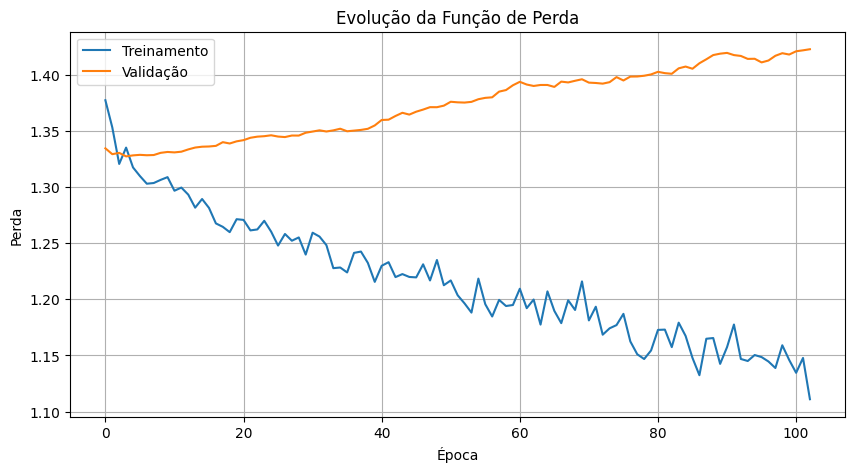

In [132]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Função de Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

Mesmo com a aplicação das técnicas, a função de perda dos dados de validação continuar maior que os de treino, ou seja, o overfitting persiste.

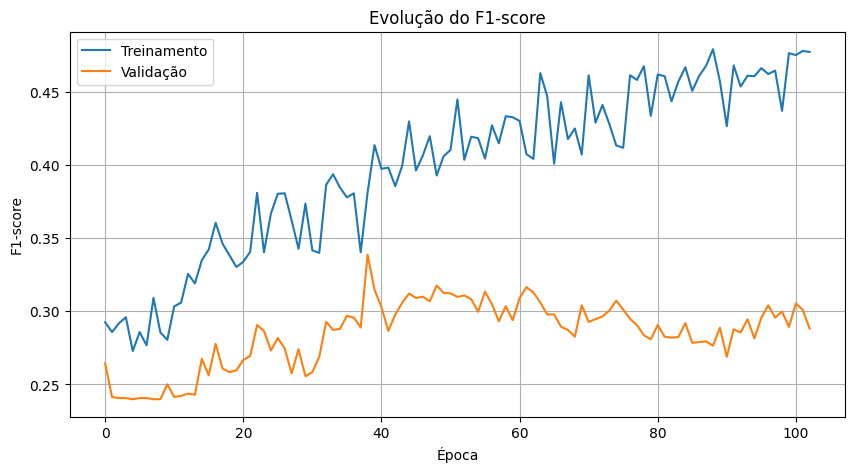

In [133]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['f1_score'], label='Treinamento')
plt.plot(history.history['val_f1_score'], label='Validação')
plt.title('Evolução do F1-score')
plt.xlabel('Época')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()

Tivemos também uma melhora modesta no F1-score, porém, o de treinamento até bem acima do de validação, o que demonstra que o modelo ainda tem dificuldades em generalizar novos dados.

In [134]:
from sklearn.metrics import classification_report

phi = model.predict(X_test, verbose = 0)
y_pred = np.argmax(phi, axis = 1)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.40      0.81      0.54       103
         1.0       0.13      0.05      0.07        42
         2.0       0.18      0.04      0.06        54
         3.0       0.22      0.08      0.12        51

    accuracy                           0.36       250
   macro avg       0.24      0.24      0.20       250
weighted avg       0.27      0.36      0.27       250



O classification report demonstra um sério problema: O desequilíbrio entre as classes.

Além da dificuldade do mesmo em entender os padrões do dataset.

## Comparando com a parte 1

In [135]:
# Definindo o tamanho do loop
num_repeticoes = 30

### Loop da parte 1 (Modelo MLPClassifier)

In [136]:
from sklearn.metrics import f1_score
f1_score_mlpc = []

for i in range(num_repeticoes):
  print(f'Execução MLPClassifier {i+1}/{num_repeticoes}')

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  mlpc = MLPClassifier(random_state=i, max_iter=500).fit(X_train_scaled, y_train)

  y_pred = mlpc.predict(X_test_scaled)

  f1 = f1_score(y_test, y_pred, average='weighted')
  f1_score_mlpc.append(f1)

Execução MLPClassifier 1/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 2/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 3/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 4/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 5/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 6/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 7/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 8/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 9/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 10/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 11/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 12/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 13/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 14/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 15/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 16/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 17/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 18/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 19/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 20/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 21/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 22/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 23/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 24/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 25/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 26/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 27/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 28/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 29/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Execução MLPClassifier 30/30


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Loop do Modelo em keras (com as técnicas de regularização)

In [137]:

f1_scores_keras = []

for i in range(num_repeticoes):
    print(f'Execução Keras {i+1}/{num_repeticoes}')
    X_train_val, X_validation, y_train_val, y_validation = train_test_split(X, y, test_size=0.30, random_state=i)
    
    # Codificando os rótulos
    encoder = keras.layers.CategoryEncoding(
    # Quantidade de classes unicas
        num_tokens=4,
        output_mode="one_hot"
    )
    y_train_encoded = encoder(y_train_val)
    y_validation_encoded = encoder(y_validation)

    # Early stopping 
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss',           
        start_from_epoch=50,
        restore_best_weights=True,
        patience=50
    )
    
    # Definir modelo novo a cada execução (para resetar pesos)
    model = keras.Sequential([
        keras.layers.Input((9,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(units=4, activation="softmax")
    ])
    
    model.compile(
        loss="categorical_crossentropy",
        metrics=[keras.metrics.F1Score(average='weighted')],
    )
    
    history = model.fit(
        X_train_val, y_train_encoded,
        validation_data=(X_validation, y_validation_encoded),
        epochs=500,
        verbose=0,   # Para não poluir a saída
        batch_size=128,
        callbacks=[early_stop]
    )
    
    # Pega o melhor valor de F1 na validação (melhor época)
    f1_val = max(history.history['val_f1_score'])
    f1_scores_keras.append(f1_val)



Execução Keras 1/30
Execução Keras 2/30
Execução Keras 3/30
Execução Keras 4/30
Execução Keras 5/30
Execução Keras 6/30
Execução Keras 7/30
Execução Keras 8/30
Execução Keras 9/30
Execução Keras 10/30
Execução Keras 11/30
Execução Keras 12/30
Execução Keras 13/30
Execução Keras 14/30
Execução Keras 15/30
Execução Keras 16/30
Execução Keras 17/30
Execução Keras 18/30
Execução Keras 19/30
Execução Keras 20/30
Execução Keras 21/30
Execução Keras 22/30
Execução Keras 23/30
Execução Keras 24/30
Execução Keras 25/30
Execução Keras 26/30
Execução Keras 27/30
Execução Keras 28/30
Execução Keras 29/30
Execução Keras 30/30


Após a execução do loop de cada modelo, temos:

In [138]:
print(f'F1 Score médio do MLPClassifier após {num_repeticoes} execuções: {np.mean(f1_score_mlpc):.4f}')
print(f'Desvio padrão do MLPClassifier: {np.std(f1_score_mlpc):.4f}')

F1 Score médio do MLPClassifier após 30 execuções: 0.2891
Desvio padrão do MLPClassifier: 0.0177


In [139]:
# Resultado final: média e desvio padrão do F1 score
print(f'F1 Score médio do Keras(validação) após {num_repeticoes} execuções: {np.mean(f1_scores_keras):.4f}')
print(f'Desvio padrão do Keras: {np.std(f1_scores_keras):.4f}')

F1 Score médio do Keras(validação) após 30 execuções: 0.2945
Desvio padrão do Keras: 0.0259


### Ou seja:

Mesmo com o aprimoramento do modelo Keras, continuamos tendo resultados ruins.

Ambos os modelos, tanto o MLPClassifier quanto o keras, estão tendo dificuldades em lidas com novos dados (que não sejam os de treinamento).

Umas das causas pode ser o desbalanceamento de classes e outra mais importante que veremos a seguir:

#### E com algumas linhas de código, evitariamos estresse: Matriz de correlação.

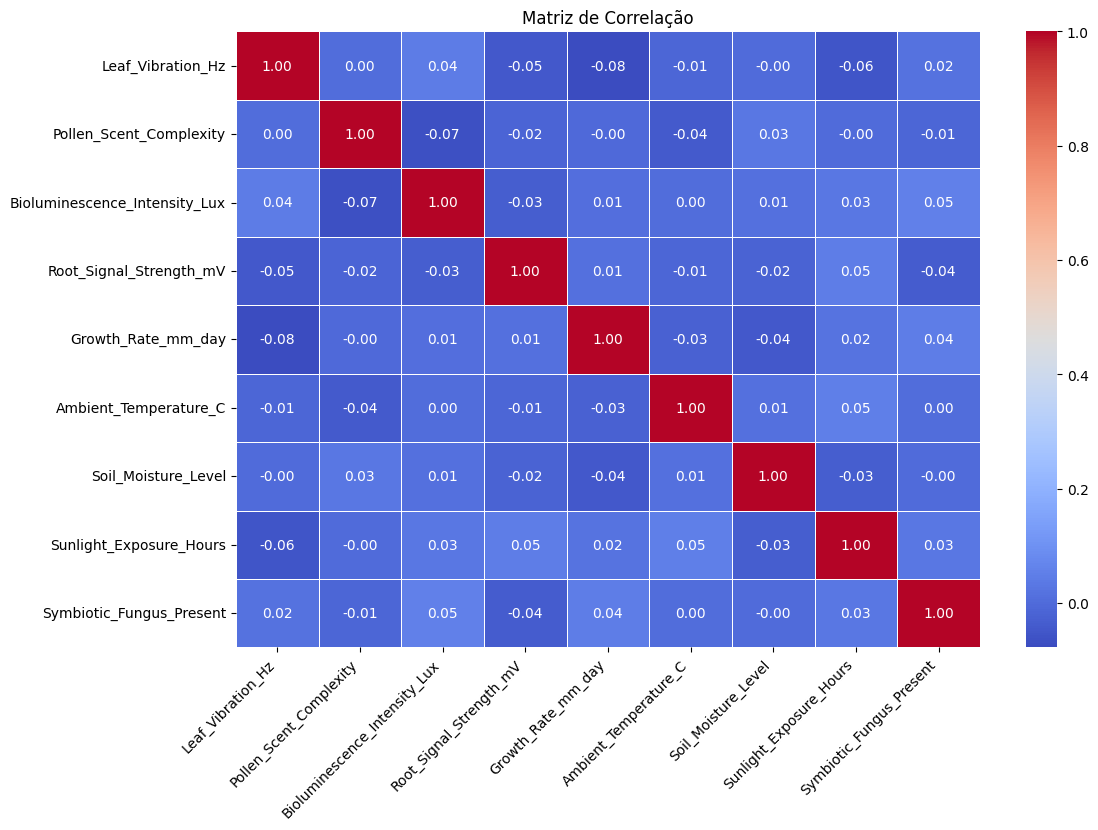

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = dataframe.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.xticks(rotation=45, ha='right')
plt.show()


Correlações fracas!